<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_cifar100_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_X = x_train.reshape(50000,32,32,3)
test_X = x_test.reshape(10000,32,32,3)
print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
train_X = train_X.astype('float32')
train_X = train_X / 255

In [ ]:
from keras.utils import to_categorical
train_Y = to_categorical(y_train)
test_Y = to_categorical(y_test)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [ ]:
batch_size = 64
epochs = 20
classes = 100

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (32,32,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1929 - accuracy: 0.6624
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9217 - accuracy: 0.7339
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.6673 - accuracy: 0.8016
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.4846 - accuracy: 0.8492
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.3620 - accuracy: 0.8853
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.3032 - accuracy: 0.9025
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2585 - accuracy: 0.9165
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2210 - accuracy: 0.9278
Epoch 9/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2250 - accuracy: 0.9280
Epoch 10/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2044 - accuracy: 0.9343

In [ ]:
model.save('/content/drive/MyDrive/save_model/modelcifar100.h5')

Test loss:  2598.546630859375
Test accuaracy:  0.16459999978542328


Text(0.5, 1.0, 'Training & Test Accuracy')

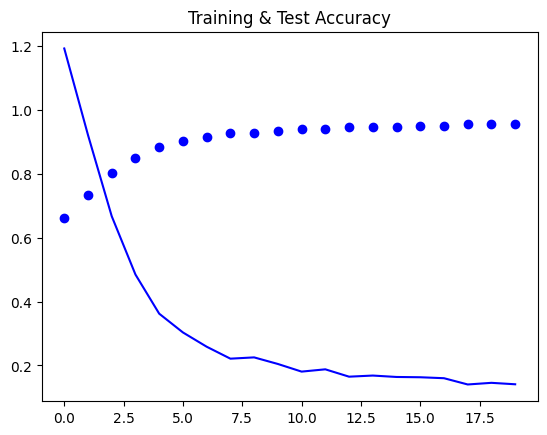

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_X, test_Y, verbose = 0)
print('Test loss: ', eval[0])
print('Test accuaracy: ', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, loss, 'b')
plt.title('Training & Test Accuracy')

In [ ]:
from PIL import Image
import numpy as np
hinh = Image.open("test.jfif")
print(hinh.size)

hinh = np.array(hinh)
print(hinh.shape)

hinh = hinh.reshape(1,32,32,3)
hinh = hinh.astype('float32')/255

y= model.predict(hinh)

(140, 116)
(116, 140, 3)


ValueError: ignored